In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.decomposition import PCA
from scipy.stats import zscore


In [2]:
# Read the dataset

VehicleDf = pd.read_csv("vehicle.csv")  
VehicleDf.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [4]:
#Explore the data
VehicleDf.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,841.000000,842.000000,840.000000,844.000000,846.000000,845.000000,845.000000,843.000000,846.000000,843.000000,844.000000,844.000000,842.000000,840.000000,845.000000,845.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.152172,15.778292,33.520198,7.891463,4.601217,33.214848,7.816186,2.592933,14.515652,31.411004,176.666903,32.584808,7.486190,4.920649,8.936081,6.155809,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.000000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.500000,173.500000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


#### From the describe output we see the column values are normally distributed if observed the mean and median for each feature. The Scaled_variance.1 feature seems to be skewed as the median is less than mean. We can plot the scatterplot to check.

In [6]:
#Check datatype
VehicleDf.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

#### The datatype output is useful to check if there are non numeric values in columns. As we see all datatypes are int / float so the values are correct.

In [7]:
#Check for null values.
VehicleDf.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

#### There are multiple null values across lot many features. We will use median/mean value to replace.

In [8]:
#Using fillna to fill mean values of those columns.
VehicleDf.fillna(VehicleDf.mean(),inplace=True)

In [9]:
VehicleDf.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.828775,82.110451,168.888095,61.678910,8.567376,168.901775,40.933728,20.582444,147.998818,188.631079,439.494076,174.709716,72.447743,6.364286,12.602367,188.919527,195.632388
std,8.234474,6.133943,15.740902,33.400979,7.882119,4.601217,33.195188,7.811559,2.588326,14.515652,31.355195,176.457706,32.546223,7.468450,4.903148,8.930792,6.152166,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,137.000000,167.000000,318.250000,149.000000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,168.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,364.000000,174.000000,72.000000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,586.750000,198.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [10]:
#Check for null values to verify
VehicleDf.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

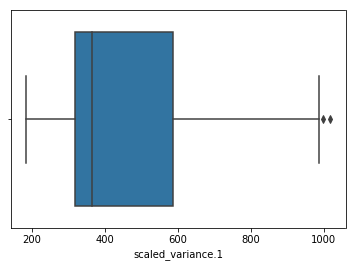

In [19]:
#check outliers using boxplot
#plotdata=VehicleDf.drop("class",axis=1)
sns.boxplot(plotdata["scaled_variance.1"])

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


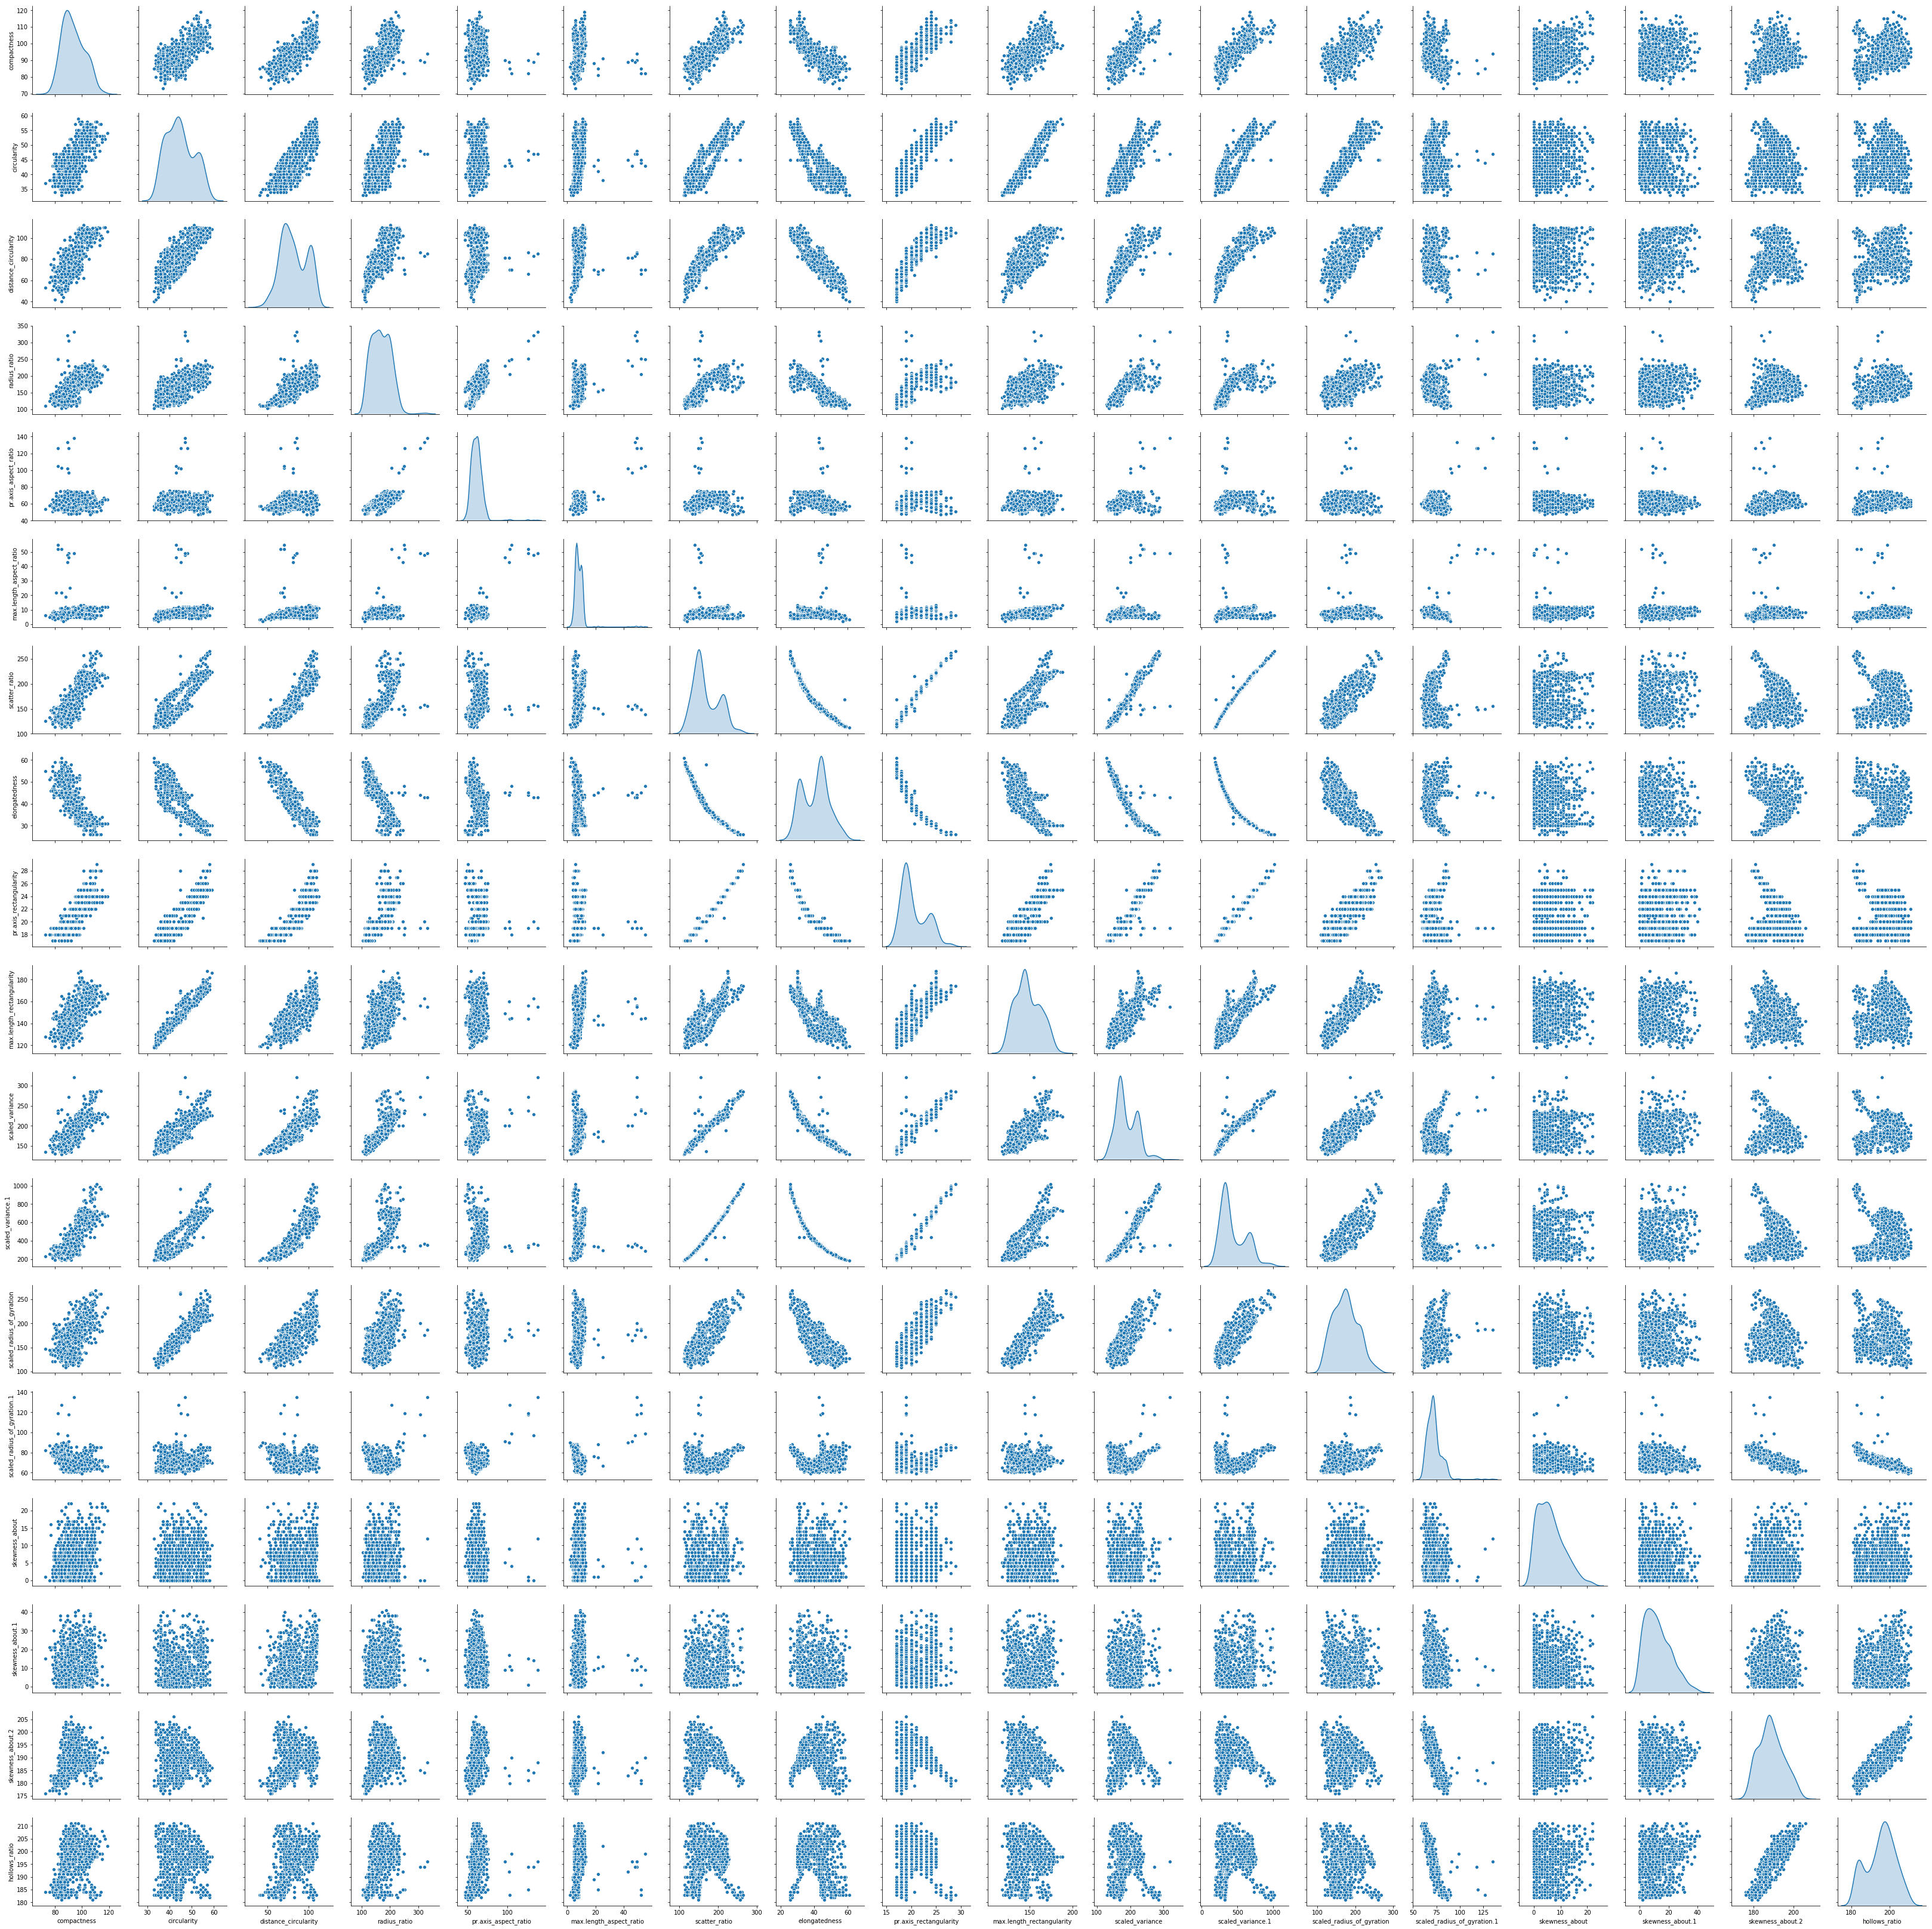

In [20]:
#Visually inspect the relationship between independent dimensions

sns.pairplot(VehicleDf, diag_kind='kde') 

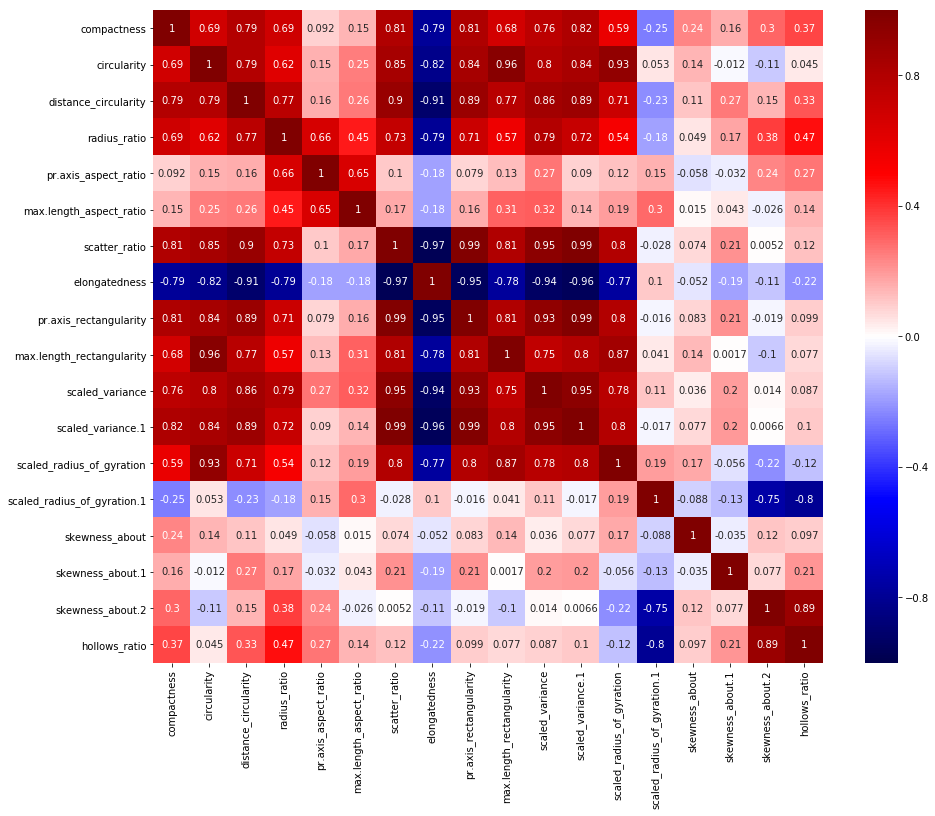

In [23]:
#heat map for correlation just to know the  quantified relation between the variable
#calculate the correlation matrix

corr = VehicleDf.corr()
fig, ax = plt.subplots()
fig.set_size_inches(15, 12)
sns.heatmap(corr, cmap='seismic', annot=True, vmax=1, vmin=-1)

In [ ]:
# From the above correlation graph we see there are 5 distinct groups.

# 1. We seee Compactness, circularity, distance_circularity and radius_ratio features strong positively correlated 

# 2. pr.axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance.1 and scaled_radius of gyration are other set positively correlated.

# 3. scater_ratio has strong correlation with both groups 1 and 2

# 4. elogatedness has strong negative correlation with both groups 1 and 2

# 5. There are remaining features which are not strongly correlated 

#  Based on above, we will keep the attributes from 1,2,3,4 groups as they will better explain variance in data in components.

In [33]:
X=VehicleDf.drop("class",axis=1)
X.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio'],
      dtype='object')

In [37]:
X=X[['compactness', 'circularity', 'distance_circularity', 'radius_ratio','scatter_ratio','elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity','scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration','hollows_ratio']]

#' pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
# 'skewness_about.2',

In [38]:
# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.68623251  0.79084412  0.69065619  0.81319623 -0.78957587
   0.81459888  0.67694334  0.76367265  0.81686705  0.58584865  0.36598446]
 [ 0.68623251  1.00118343  0.79395399  0.62170187  0.84921058 -0.82287347
   0.84597164  0.96308094  0.7977645   0.83951746  0.92798524  0.04537164]
 [ 0.79084412  0.79395399  1.00118343  0.76798667  0.90547061 -0.91251368
   0.89418513  0.77558624  0.86300031  0.88837793  0.70678835  0.3324884 ]
 [ 0.69065619  0.62170187  0.76798667  1.00118343  0.73509724 -0.79072934
   0.70912305  0.56987817  0.79498064  0.72100219  0.5371705   0.47181974]
 [ 0.81319623  0.84921058  0.90547061  0.73509724  1.00118343 -0.97187169
   0.99054075  0.80931225  0.9494185   0.99496023  0.80021174  0.11858838]
 [-0.78957587 -0.82287347 -0.91251368 -0.79072934 -0.97187169  1.00118343
  -0.9502004  -0.77643696 -0.93782312 -0.95620413 -0.76693543 -0.21697531]
 [ 0.81459888  0.84597164  0.89418513  0.70912305  0.99054075 -0.9502004
   1.001183

In [39]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n %s', eig_vecs)
print('\n Eigen Values \n %s', eig_vals)

Eigen Vectors 
 %s [[-0.27743746 -0.2166476  -0.04962891 -0.64108753  0.63342546  0.03328185
  -0.19932283  0.04095047 -0.13641257  0.01455973 -0.00302564 -0.00802886]
 [-0.29875913  0.19982792  0.43841976  0.06009315  0.0551928   0.06220136
   0.11265842  0.16377761 -0.07224286 -0.78147695 -0.01026804 -0.11192741]
 [-0.30632111 -0.14181274 -0.00651588 -0.03791103 -0.45154322  0.4145226
  -0.70712737  0.02341916  0.06689543 -0.03356614  0.03654388  0.03663116]
 [-0.26137276 -0.34866099 -0.09645135  0.66220891  0.43961163  0.24134746
   0.03031183  0.27328013  0.15481067  0.10029065  0.00676899  0.033438  ]
 [-0.32240244  0.03994871 -0.20622645 -0.09016031 -0.16544396 -0.08026073
   0.18405874  0.14003396  0.07531139  0.00520853 -0.80190315  0.32825953]
 [ 0.31815804  0.04844374  0.17818072 -0.07316957  0.23474073  0.15157546
  -0.13861101 -0.28525924  0.7801987  -0.15198347 -0.18940827  0.11392041]
 [-0.31976137  0.0582679  -0.19919037 -0.15629385 -0.15088564 -0.05268351
   0.20820447 

In [40]:
print("Eigen Values:")
pd.DataFrame(eig_vals).transpose()

Eigen Values:


,0,1,2,3,4,5,6,7,8,9,10,11
0,9.229101,1.381369,0.540925,0.335597,0.204527,0.107799,0.092861,0.046522,0.040556,0.021744,0.003621,0.00958


In [41]:
# We will check the cumulative variance each components explaining.

tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 76.81826333  88.31606126  92.81843946  95.6117771   97.3141546
  98.21141966  98.98435027  99.37157269  99.7091417   99.89012505
  99.96986024 100.        ]


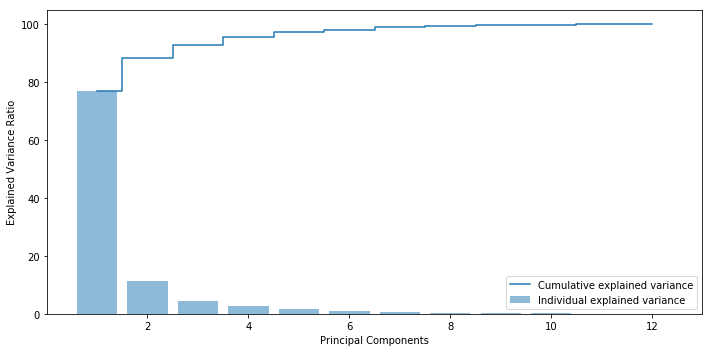

In [42]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

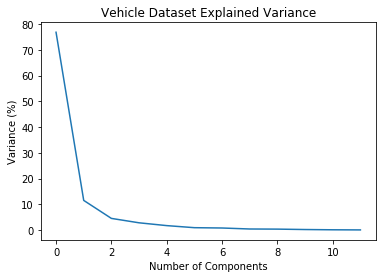

In [50]:
# Another plot - elbow plot
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(var_exp)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Vehicle Dataset Explained Variance')
plt.show()

In [ ]:
# From above we see the first 4 principle components explain 95% variance of all data.

In [44]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)

principalComponents = pca.fit_transform(X_std)

In [45]:
principalComponents

array([[ 0.17907039, -0.00652531, -1.07367914,  0.09927976],
       [-1.61053603,  0.45209048, -0.31295812, -0.41768268],
       [ 3.69885735,  0.05814132,  0.20701331,  0.12788026],
       ...,
       [ 4.81493409,  0.53764224, -0.1881254 , -0.12742308],
       [-3.31876127,  0.43530127,  0.52419595,  0.09957061],
       [-4.64441687, -0.31087943,  0.19476422, -0.35556711]])

In [46]:
principalDf = pd.DataFrame(data = principalComponents , columns = ['Component1', 'Component2','Component3','Component4'])

In [48]:
principalDf.head()

,Component1,Component2,Component3,Component4
0,0.179070,-0.006525,-1.073679,0.099280
1,-1.610536,0.452090,-0.312958,-0.417683
2,3.698857,0.058141,0.207013,0.127880
3,-1.864696,1.852050,-0.536895,-0.501961
4,-0.601663,-1.341949,0.802017,2.140370


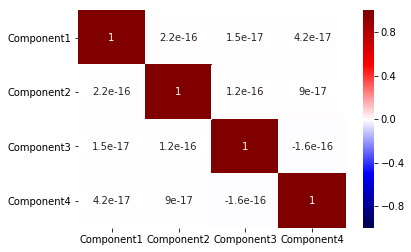

In [52]:
#Check for the components are entirely non correlated.
corr = principalDf.corr()
sns.heatmap(corr, cmap='seismic', annot=True, vmax=1, vmin=-1)